# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [ ]:
# from google.colab import drive
# import os
#
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Colab Notebooks/')

Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [ ]:
# !jupyter nbconvert --to html Copy\ of\ robot_vacuum.ipynb

You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
# make sure numpy is installed
!pip install -q numpy

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'north'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [ ]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: suck
step 1 - action: east
step 2 - action: west
step 3 - action: west
step 4 - action: suck
step 5 - action: north
step 6 - action: east
step 7 - action: south
step 8 - action: north
step 9 - action: north
step 10 - action: west
step 11 - action: north
step 12 - action: north
step 13 - action: north
step 14 - action: west
step 15 - action: suck
step 16 - action: east
step 17 - action: east
step 18 - action: south
step 19 - action: west


3

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [ ]:
# Your code and description goes here

In [1]:
import numpy as np
import random
import pandas as pd

import matplotlib.pyplot as plt

# ========== Simple Randomized Agent ========== TASK 1
def simple_randomized_agent(bumpers, dirty):
    """
    This agent make random decision.
    - It does not care if there wall or not.
    - It does not care if there is dirt or not.
    - It just pick any action randomly from the list.
    """
    return np.random.choice(["north", "east", "west", "south", "suck"])


def simple_environment(agent_function, max_steps, grid_size, verbose=True):
    # This function simulate the environment where the vacuum cleaner agent will operate.
    # It will track agent's actions and stop when all dirt is cleaned or max steps is reached.

    count = 0  # Keep track of how many steps the agent take
    num_cleaned = 0  # Count how many dirty squares got cleaned

    # Create a room grid with random dirt placement.
    # 80% chance of clean, 20% chance of dirty.
    floor = np.random.choice(["clean", "dirty"], size=(grid_size, grid_size), p=[0.8, 0.2])
    print(floor)

    # Randomly place the agent somewhere in the grid
    robot_row = random.randint(0, len(floor) - 1)
    robot_col = random.randint(0, len(floor) - 1)

    # Define bumpers (wall sensors) that tell if agent is hitting a wall
    bumpers = {"north": False, "south": False, "west": False, "east": False}

    while count < max_steps:  # Loop until max steps is reached

        dirt = floor[robot_row][robot_col] == "dirty"  # Check if current square is dirty

        # Update bumper sensors based on agent position
        if robot_row == 0:  # If at top row, north wall is there
            bumpers["north"] = True
        else:
            bumpers["north"] = False

        if robot_row == len(floor) - 1:  # If at bottom row, south wall is there
            bumpers["south"] = True
        else:
            bumpers["south"] = False

        if robot_col == 0:  # If at leftmost column, west wall is there
            bumpers["west"] = True
        else:
            bumpers["west"] = False

        if robot_col == len(floor[0]) - 1:  # If at rightmost column, east wall is there
            bumpers["east"] = True
        else:
            bumpers["east"] = False

        # Get the agent's next action based on its decision function
        action = agent_function(bumpers, dirt)

        # Move agent based on action, but only if no wall is in that direction
        if action == "north" and not bumpers["north"]:
            robot_row = robot_row - 1  # Move up
        elif action == "south" and not bumpers["south"]:
            robot_row = robot_row + 1  # Move down
        elif action == "west" and not bumpers["west"]:
            robot_col = robot_col - 1  # Move left
        elif action == "east" and not bumpers["east"]:
            robot_col = robot_col + 1  # Move right
        elif action == "suck" and floor[robot_row][robot_col] == "dirty":
            floor[robot_row][robot_col] = "clean"  # Clean the square
            num_cleaned = num_cleaned + 1  # Increase cleaned count

        print("step", count , "- action:", action)

        # If all squares are clean, return how many steps were needed
        if np.all(floor == "clean"):
            print("All squares cleaned in", count, "steps.")
            return count


        count = count + 1  # Increase step count
        print(str(num_cleaned) + " " + "sqaured cleaned in Total")


Show that your environment works with the simple randomized agent from above.

In [2]:
print(simple_environment(simple_randomized_agent, 10000, 5, verbose=True))

[['clean' 'clean' 'clean' 'clean' 'clean']
 ['clean' 'clean' 'clean' 'dirty' 'clean']
 ['clean' 'dirty' 'dirty' 'clean' 'dirty']
 ['clean' 'clean' 'dirty' 'clean' 'clean']
 ['clean' 'clean' 'clean' 'dirty' 'dirty']]
step 0 - action: north
0 sqaured cleaned in Total
step 1 - action: south
0 sqaured cleaned in Total
step 2 - action: suck
0 sqaured cleaned in Total
step 3 - action: west
0 sqaured cleaned in Total
step 4 - action: north
0 sqaured cleaned in Total
step 5 - action: east
0 sqaured cleaned in Total
step 6 - action: suck
0 sqaured cleaned in Total
step 7 - action: south
0 sqaured cleaned in Total
step 8 - action: east
0 sqaured cleaned in Total
step 9 - action: east
0 sqaured cleaned in Total
step 10 - action: suck
1 sqaured cleaned in Total
step 11 - action: south
1 sqaured cleaned in Total
step 12 - action: west
1 sqaured cleaned in Total
step 13 - action: suck
2 sqaured cleaned in Total
step 14 - action: west
2 sqaured cleaned in Total
step 15 - action: suck
3 sqaured cleane

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [3]:
import numpy as np
import random
import pandas as pd

import matplotlib.pyplot as plt

# ========== Simple Reflex Agent ========== TASK 2
def simple_reflex_agent(bumpers, dirty):
    """
    This agent make smarter decision.
    - If the square is dirty, it suck.
    - If no dirt, it move to random direction.
    - It remove any move that will hit a wall (bumper sensor).
    """
    actions = ["north", "east", "west", "south"]  # All movement options
    copy = actions[:]  # Make copy to modify safely

    # Remove the direction that have bumper (wall)
    for i in copy:
        if bumpers[i] == True:
            actions.remove(i)

    # If square dirty, clean it
    if dirty == True:
        return "suck"

    # Else, move randomly in valid direction
    return np.random.choice(actions)

def simple_environment(agent_function, max_steps, grid_size, verbose=True):
    # This function simulate the environment where the vacuum cleaner agent will operate.
    # It will track agent's actions and stop when all dirt is cleaned or max steps is reached.

    count = 0  # Keep track of how many steps the agent take
    num_cleaned = 0  # Count how many dirty squares got cleaned

    # Create a room grid with random dirt placement.
    # 80% chance of clean, 20% chance of dirty.
    floor = np.random.choice(["clean", "dirty"], size=(grid_size, grid_size), p=[0.8, 0.2])
    print(floor)

    # Randomly place the agent somewhere in the grid
    robot_row = random.randint(0, len(floor) - 1)
    robot_col = random.randint(0, len(floor) - 1)

    # Define bumpers (wall sensors) that tell if agent is hitting a wall
    bumpers = {"north": False, "south": False, "west": False, "east": False}

    while count < max_steps:  # Loop until max steps is reached

        dirt = floor[robot_row][robot_col] == "dirty"  # Check if current square is dirty

        # Update bumper sensors based on agent position
        if robot_row == 0:  # If at top row, north wall is there
            bumpers["north"] = True
        else:
            bumpers["north"] = False

        if robot_row == len(floor) - 1:  # If at bottom row, south wall is there
            bumpers["south"] = True
        else:
            bumpers["south"] = False

        if robot_col == 0:  # If at leftmost column, west wall is there
            bumpers["west"] = True
        else:
            bumpers["west"] = False

        if robot_col == len(floor[0]) - 1:  # If at rightmost column, east wall is there
            bumpers["east"] = True
        else:
            bumpers["east"] = False

        # Get the agent's next action based on its decision function
        action = agent_function(bumpers, dirt)

        # Move agent based on action, but only if no wall is in that direction
        if action == "north" and not bumpers["north"]:
            robot_row = robot_row - 1  # Move up
        elif action == "south" and not bumpers["south"]:
            robot_row = robot_row + 1  # Move down
        elif action == "west" and not bumpers["west"]:
            robot_col = robot_col - 1  # Move left
        elif action == "east" and not bumpers["east"]:
            robot_col = robot_col + 1  # Move right
        elif action == "suck" and floor[robot_row][robot_col] == "dirty":
            floor[robot_row][robot_col] = "clean"  # Clean the square
            num_cleaned = num_cleaned + 1  # Increase cleaned count

        print("step", count , "- action:", action)

        # If all squares are clean, return how many steps were needed
        if np.all(floor == "clean"):
            print("All squares cleaned in", count, "steps.")
            print(str(num_cleaned) + " " + "sqaured cleaned in Total")
            return count


        count = count + 1  # Increase step count
        print(str(num_cleaned) + " " + "sqaured cleaned in Total")


In [4]:
print(simple_environment(simple_reflex_agent, 1000, 5, verbose=True))

[['dirty' 'clean' 'dirty' 'clean' 'clean']
 ['clean' 'clean' 'clean' 'clean' 'clean']
 ['clean' 'dirty' 'dirty' 'clean' 'clean']
 ['clean' 'clean' 'clean' 'dirty' 'clean']
 ['clean' 'clean' 'clean' 'clean' 'dirty']]
step 0 - action: east
0 sqaured cleaned in Total
step 1 - action: north
0 sqaured cleaned in Total
step 2 - action: east
0 sqaured cleaned in Total
step 3 - action: suck
1 sqaured cleaned in Total
step 4 - action: east
1 sqaured cleaned in Total
step 5 - action: west
1 sqaured cleaned in Total
step 6 - action: east
1 sqaured cleaned in Total
step 7 - action: west
1 sqaured cleaned in Total
step 8 - action: east
1 sqaured cleaned in Total
step 9 - action: north
1 sqaured cleaned in Total
step 10 - action: west
1 sqaured cleaned in Total
step 11 - action: west
1 sqaured cleaned in Total
step 12 - action: suck
2 sqaured cleaned in Total
step 13 - action: west
2 sqaured cleaned in Total
step 14 - action: suck
3 sqaured cleaned in Total
step 15 - action: north
3 sqaured cleaned 

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [ ]:
'''
The agent keeps track of where it is and where it has been by using variables
it has different modes to decide what to do first it starts in find corner mode
in this mode it moves north and west until it hits the wall so it can find the top left corner
when it finds the corner it switches to clean sweep mode and starts cleaning in a structured way

the agent remembers how many times it moved north and how many times it moved west so it can estimate its starting position
it also keeps track of which squares it has visited and which squares had dirt so it does not go back to the same places too much

when it is cleaning it moves in a zigzag pattern going east until it hits the wall then going south one step
and moving west until it hits the wall again It keeps doing this until the whole floor is clean
if it finds dirt it stops and cleans before moving again this way it makes sure it does not miss any spot

if the whole floor is clean the agent stops and finishes its work
this makes it better than the other agents because it does not move randomly or forget where it has been it moves smartly to clean everything as fast as possible.
'''


In [1]:
import numpy as np
import random
import pandas as pd

import matplotlib.pyplot as plt

# TASK 3
class ModelBasedAgent:
    def __init__(self):
        """Initialize agent state variables."""
        #self.initialized = False  # Check if the agent is starting
        self.mode = "FIND_CORNER"  # Modes: "FIND_CORNER", "CLEAN_SWEEP", "DONE"
        self.row_estimate = None  # Estimated row position
        self.col_estimate = None  # Estimated column position
        self.direction = "east"  # Movement direction during cleaning phase
        self.visited_squares = set()  # Track visited locations
        self.known_dirt = set() # Track dirty squares
        self.N = 0    # counts how much N we go to so robot can count once we navigate to nw or 0,0 it counts the N part that way it will know it was this much N
        self.W = 0     # counts how much W we go to so robot can count once we navigate to nw or 0,0 it counts the w part that way it will know it was this much w

    def __call__(self, bumpers, dirty):
        """The agent function that decides actions based on its state."""
        # This function will contain logic to:

        # 2. Move to (0,0) if in "FIND_CORNER" mode

        if self.mode == "FIND_CORNER":
            if bumpers["north"] == True and bumpers["west"] == True:
                self.col_estimate = 0
                self.row_estimate = 0
                #print("ROBOT THINKING ................")
                #print("HMMM I THINK I WAS RANDOMLY PLACED AT" + " " + str(self.N) + " row" + " "+ str(self.W) + " col")
                self.mode = "CLEAN_SWEEP"
            elif bumpers["north"] == False:
                self.N = self.N+1
                return "north"
            elif bumpers["west"] == False:
                self.W = self.W+1
                return "west"

        # 3. Clean in a structured pattern when in "CLEAN_SWEEP" mode
        if self.mode == "CLEAN_SWEEP":
            if dirty == True:
                self.known_dirt.add((self.row_estimate,self.col_estimate))
                self.visited_squares.add((self.row_estimate,self.col_estimate))
                return "suck"
            if self.direction == "east":
                if bumpers["east"] == False:
                    self.col_estimate = self.col_estimate+1
                    self.visited_squares.add((self.row_estimate,self.col_estimate))
                    return "east"
                elif bumpers["south"] == False:
                    self.row_estimate = self.row_estimate+1
                    self.visited_squares.add((self.row_estimate,self.col_estimate))
                    self.direction = "west"
                    return "south"


            if self.direction == "west":
                if bumpers["west"] == False:
                    self.col_estimate = self.col_estimate -1
                    self.visited_squares.add((self.row_estimate,self.col_estimate))
                    return "west"
                elif bumpers["south"] == False:
                    self.row_estimate = self.row_estimate+1
                    self.visited_squares.add((self.row_estimate,self.col_estimate))
                    self.direction = "east"
                    return "south"
        return 'suck'

def simple_environment(agent_function, max_steps, grid_size, verbose=True):
    # This function simulate the environment where the vacuum cleaner agent will operate.
    # It will track agent's actions and stop when all dirt is cleaned or max steps is reached.

    count = 0  # Keep track of how many steps the agent take
    num_cleaned = 0  # Count how many dirty squares got cleaned

    # Create a room grid with random dirt placement.
    # 80% chance of clean, 20% chance of dirty.
    floor = np.random.choice(["clean", "dirty"], size=(grid_size, grid_size), p=[0.8, 0.2])
    print(floor)

    # Randomly place the agent somewhere in the grid
    robot_row = random.randint(0, len(floor) - 1)
    robot_col = random.randint(0, len(floor) - 1)

    # Define bumpers (wall sensors) that tell if agent is hitting a wall
    bumpers = {"north": False, "south": False, "west": False, "east": False}

    while count < max_steps:  # Loop until max steps is reached

        dirt = floor[robot_row][robot_col] == "dirty"  # Check if current square is dirty

        # Update bumper sensors based on agent position
        if robot_row == 0:  # If at top row, north wall is there
            bumpers["north"] = True
        else:
            bumpers["north"] = False

        if robot_row == len(floor) - 1:  # If at bottom row, south wall is there
            bumpers["south"] = True
        else:
            bumpers["south"] = False

        if robot_col == 0:  # If at leftmost column, west wall is there
            bumpers["west"] = True
        else:
            bumpers["west"] = False

        if robot_col == len(floor[0]) - 1:  # If at rightmost column, east wall is there
            bumpers["east"] = True
        else:
            bumpers["east"] = False

        # Get the agent's next action based on its decision function
        action = agent_function(bumpers, dirt)

        # Move agent based on action, but only if no wall is in that direction
        if action == "north" and not bumpers["north"]:
            robot_row = robot_row - 1  # Move up
        elif action == "south" and not bumpers["south"]:
            robot_row = robot_row + 1  # Move down
        elif action == "west" and not bumpers["west"]:
            robot_col = robot_col - 1  # Move left
        elif action == "east" and not bumpers["east"]:
            robot_col = robot_col + 1  # Move right
        elif action == "suck" and floor[robot_row][robot_col] == "dirty":
            floor[robot_row][robot_col] = "clean"  # Clean the square
            num_cleaned = num_cleaned + 1  # Increase cleaned count

        print("step", count , "- action:", action)

        # If all squares are clean, return how many steps were needed
        if np.all(floor == "clean"):
            print("All squares cleaned in", count, "steps.")
            print(str(num_cleaned) + " " + "sqaured cleaned in Total")
            return count


        count = count + 1  # Increase step count
        print(str(num_cleaned) + " " + "sqaured cleaned in Total")

Show how the agent works with your environment.

In [2]:
print(simple_environment(ModelBasedAgent(), 100, 5, verbose=True))

[['clean' 'clean' 'clean' 'clean' 'clean']
 ['clean' 'dirty' 'clean' 'dirty' 'clean']
 ['dirty' 'clean' 'clean' 'clean' 'clean']
 ['clean' 'dirty' 'clean' 'dirty' 'clean']
 ['clean' 'clean' 'clean' 'clean' 'clean']]
step 0 - action: north
0 sqaured cleaned in Total
step 1 - action: west
0 sqaured cleaned in Total
step 2 - action: east
0 sqaured cleaned in Total
step 3 - action: east
0 sqaured cleaned in Total
step 4 - action: east
0 sqaured cleaned in Total
step 5 - action: east
0 sqaured cleaned in Total
step 6 - action: south
0 sqaured cleaned in Total
step 7 - action: west
0 sqaured cleaned in Total
step 8 - action: suck
1 sqaured cleaned in Total
step 9 - action: west
1 sqaured cleaned in Total
step 10 - action: west
1 sqaured cleaned in Total
step 11 - action: suck
2 sqaured cleaned in Total
step 12 - action: west
2 sqaured cleaned in Total
step 13 - action: south
2 sqaured cleaned in Total
step 14 - action: suck
3 sqaured cleaned in Total
step 15 - action: east
3 sqaured cleaned 

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [11]:
import numpy as np
import random
import pandas as pd

import matplotlib.pyplot as plt



# ========== Simple Randomized Agent ========== TASK 1
def simple_randomized_agent(bumpers, dirty):
    """
    This agent make random decision.
    - It does not care if there wall or not.
    - It does not care if there is dirt or not.
    - It just pick any action randomly from the list.
    """
    return np.random.choice(["north", "east", "west", "south", "suck"])

# ========== Simple Reflex Agent ========== TASK 2
def simple_reflex_agent(bumpers, dirty):
    """
    This agent make smarter decision.
    - If the square is dirty, it suck.
    - If no dirt, it move to random direction.
    - It remove any move that will hit a wall (bumper sensor).
    """
    actions = ["north", "east", "west", "south"]  # All movement options
    copy = actions[:]  # Make copy to modify safely

    # Remove the direction that have bumper (wall)
    for i in copy:
        if bumpers[i] == True:
            actions.remove(i)

    # If square dirty, clean it
    if dirty == True:
        return "suck"

    # Else, move randomly in valid direction
    return np.random.choice(actions)

# TASK 3
'''
The agent keeps track of where it is and where it has been by using variables
it has different modes to decide what to do first it starts in find corner mode
in this mode it moves north and west until it hits the wall so it can find the top left corner
when it finds the corner it switches to clean sweep mode and starts cleaning in a structured way

the agent remembers how many times it moved north and how many times it moved west so it can estimate its starting position
it also keeps track of which squares it has visited and which squares had dirt so it does not go back to the same places too much

when it is cleaning it moves in a zigzag pattern going east until it hits the wall then going south one step
and moving west until it hits the wall again It keeps doing this until the whole floor is clean
if it finds dirt it stops and cleans before moving again this way it makes sure it does not miss any spot

if the whole floor is clean the agent stops and finishes its work
this makes it better than the other agents because it does not move randomly or forget where it has been it moves smartly to clean everything as fast as possible.
'''
class ModelBasedAgent:
    def __init__(self):
        """Initialize agent state variables."""
        #self.initialized = False  # Check if the agent is starting
        self.mode = "FIND_CORNER"  # Modes: "FIND_CORNER", "CLEAN_SWEEP", "DONE"
        self.row_estimate = None  # Estimated row position
        self.col_estimate = None  # Estimated column position
        self.direction = "east"  # Movement direction during cleaning phase
        self.visited_squares = set()  # Track visited locations
        self.known_dirt = set() # Track dirty squares
        self.N = 0    # counts how much N we go to so robot can count once we navigate to nw or 0,0 it counts the N part that way it will know it was this much N
        self.W = 0     # counts how much W we go to so robot can count once we navigate to nw or 0,0 it counts the w part that way it will know it was this much w

    def __call__(self, bumpers, dirty):
        """The agent function that decides actions based on its state."""
        # This function will contain logic to:

        # 2. Move to (0,0) if in "FIND_CORNER" mode

        if self.mode == "FIND_CORNER":
            if bumpers["north"] == True and bumpers["west"] == True:
                self.col_estimate = 0
                self.row_estimate = 0
                #print("ROBOT THINKING ................")
                #print("HMMM I THINK I WAS RANDOMLY PLACED AT" + " " + str(self.N) + " row" + " "+ str(self.W) + " col")
                self.mode = "CLEAN_SWEEP"
            elif bumpers["north"] == False:
                self.N = self.N+1
                return "north"
            elif bumpers["west"] == False:
                self.W = self.W+1
                return "west"

        # 3. Clean in a structured pattern when in "CLEAN_SWEEP" mode
        if self.mode == "CLEAN_SWEEP":
            if dirty == True:
                self.known_dirt.add((self.row_estimate,self.col_estimate))
                self.visited_squares.add((self.row_estimate,self.col_estimate))
                return "suck"
            if self.direction == "east":
                if bumpers["east"] == False:
                    self.col_estimate = self.col_estimate+1
                    self.visited_squares.add((self.row_estimate,self.col_estimate))
                    return "east"
                elif bumpers["south"] == False:
                    self.row_estimate = self.row_estimate+1
                    self.visited_squares.add((self.row_estimate,self.col_estimate))
                    self.direction = "west"
                    return "south"


            if self.direction == "west":
                if bumpers["west"] == False:
                    self.col_estimate = self.col_estimate -1
                    self.visited_squares.add((self.row_estimate,self.col_estimate))
                    return "west"
                elif bumpers["south"] == False:
                    self.row_estimate = self.row_estimate+1
                    self.visited_squares.add((self.row_estimate,self.col_estimate))
                    self.direction = "east"
                    return "south"
        return 'suck'


def simple_environment(agent_function, max_steps, grid_size, verbose=True):
    # This function simulate the environment where the vacuum cleaner agent will operate.
    # It will track agent's actions and stop when all dirt is cleaned or max steps is reached.

    count = 0  # Keep track of how many steps the agent take
    num_cleaned = 0  # Count how many dirty squares got cleaned

    # Create a room grid with random dirt placement.
    # 80% chance of clean, 20% chance of dirty.
    floor = np.random.choice(["clean", "dirty"], size=(grid_size, grid_size), p=[0.8, 0.2])
    #print(floor)

    # Randomly place the agent somewhere in the grid
    robot_row = random.randint(0, len(floor) - 1)
    robot_col = random.randint(0, len(floor) - 1)

    # Define bumpers (wall sensors) that tell if agent is hitting a wall
    bumpers = {"north": False, "south": False, "west": False, "east": False}

    while count < max_steps:  # Loop until max steps is reached

        dirt = floor[robot_row][robot_col] == "dirty"  # Check if current square is dirty

        # Update bumper sensors based on agent position
        if robot_row == 0:  # If at top row, north wall is there
            bumpers["north"] = True
        else:
            bumpers["north"] = False

        if robot_row == len(floor) - 1:  # If at bottom row, south wall is there
            bumpers["south"] = True
        else:
            bumpers["south"] = False

        if robot_col == 0:  # If at leftmost column, west wall is there
            bumpers["west"] = True
        else:
            bumpers["west"] = False

        if robot_col == len(floor[0]) - 1:  # If at rightmost column, east wall is there
            bumpers["east"] = True
        else:
            bumpers["east"] = False

        # Get the agent's next action based on its decision function
        action = agent_function(bumpers, dirt)

        # Move agent based on action, but only if no wall is in that direction
        if action == "north" and not bumpers["north"]:
            robot_row = robot_row - 1  # Move up
        elif action == "south" and not bumpers["south"]:
            robot_row = robot_row + 1  # Move down
        elif action == "west" and not bumpers["west"]:
            robot_col = robot_col - 1  # Move left
        elif action == "east" and not bumpers["east"]:
            robot_col = robot_col + 1  # Move right
        elif action == "suck" and floor[robot_row][robot_col] == "dirty":
            floor[robot_row][robot_col] = "clean"  # Clean the square
            num_cleaned = num_cleaned + 1  # Increase cleaned count

        #print("step", count , "- action:", action)

        # If all squares are clean, return how many steps were needed
        if np.all(floor == "clean"):
            #print("All squares cleaned in", count, "steps.")
            return count  # Return total steps taken

        count = count + 1  # Increase step count
        #print(str(num_cleaned) + " " + "sqaured cleaned in Total")


------------------------------------------
-------------------------------------------
      Size  Randomized Agent  Simple Reflex Agent  Model-based Reflex Agent
0      5x5            424.45               110.24                     28.20
1    10x10           3038.21               963.90                    124.13
2  100x100         853901.40            324073.80                  12114.50


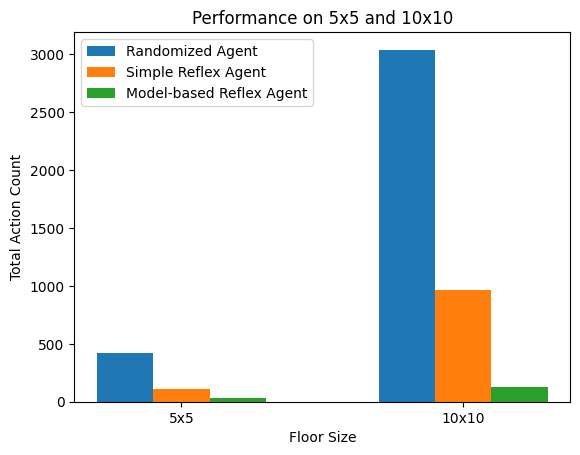

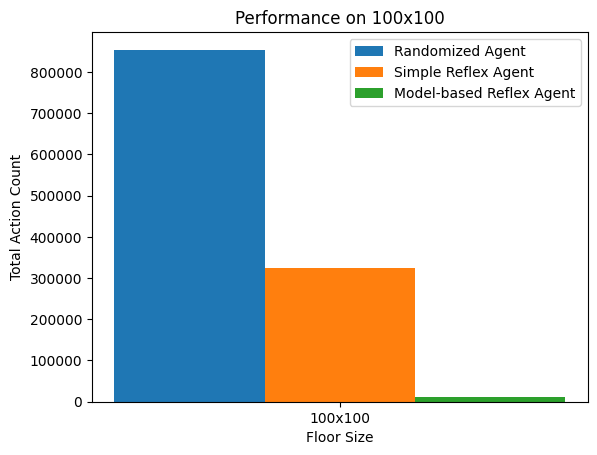

'\nin this study we compare three types of agents the randomized aagent, simple reflex agent and model-based reflex agent. \nthe goal is to see how many actions each agent takes to clean the whole room with fewer actions being better.\n\nthe randomized agent performs the worst because it move randomly without thinking. \nit often bumpss into wall and wastes many moves sometimes it even moves away from dirty spots without cleaning them\nthis leads to a huge number of steps especially in large rooms example in a 100x100 room it takes 812,167 steps which is extremely inefficient.\n\nthe simple reflex agent is better because it cleans when it detects dirt but it still moves randomly when there is no dirt nearby\nthis means it still takes extra steps and is not very efficient in large rooms while it does better than the randomized agent\nit still takes too many actions to clean everything In the 100x100 room it takes 323,322 steps which is an improvement but still too many.\n\nthe model-bas

In [12]:
#Task 4
# Lists to store results for Randomized Agent for each grid size
random_result_5_5 = []  # Store results for 5x5 grid
random_result_10_10 = []  # Store results for 10x10 grid
random_result_100_100 = []  # Store results for 100x100 grid

# Run 100 simulations for each grid size with the Randomized Agent
for i in range(0,100):
    random_result_5_5.append(simple_environment(simple_randomized_agent, max_steps = 10000,grid_size=5))
    random_result_10_10.append(simple_environment(simple_randomized_agent, max_steps = 1000000,grid_size=10))

# Lists to store results for Simple Reflex Agent
simple_result_5_5 = []  # Store results for 5x5 grid
simple_result_10_10 = []  # Store results for 10x10 grid
simple_result_100_100 = []  # Store results for 100x100 grid

# Run 100 simulations for each grid size with the Simple Reflex Agent
for i in range(0,100):
    simple_result_5_5.append(simple_environment(simple_reflex_agent, max_steps = 10000,grid_size=5))
    simple_result_10_10.append(simple_environment(simple_reflex_agent, max_steps = 100000,grid_size=10))

# Lists to store results for Model-Based Reflex Agent
model_result_5_5 = []  # Store results for 5x5 grid
model_result_10_10 = []  # Store results for 10x10 grid
model_result_100_100 = []  # Store results for 100x100 grid

# Run 100 simulations for 5x5 and 10x10 grid with Model-Based Agent
for i in range(0,100):
    model_agent = ModelBasedAgent()  # Create a new agent for each run
    model_result_5_5.append(simple_environment(model_agent,max_steps=100,grid_size=5))

    model_agent1 = ModelBasedAgent()
    model_result_10_10.append(simple_environment(model_agent1,max_steps=10000,grid_size=10))

# Run only 10 simulations for 100x100 because will take about 95 minutes to run so for now put 10 only it gives the same result honestly
for i in range(0,10):
    random_result_100_100.append(simple_environment(simple_randomized_agent, max_steps=10000000, grid_size=100))
    simple_result_100_100.append(simple_environment(simple_reflex_agent, max_steps=1000000, grid_size=100))

    model_agent2 = ModelBasedAgent()
    model_result_100_100.append(simple_environment(model_agent2, max_steps=100000, grid_size=100))

# ======== Calculating Averages ========

# Find average number of steps taken for 5x5 grid
random_result_average_5_5 = sum(random_result_5_5) / len(random_result_5_5)
simple_result_average_5_5 = sum(simple_result_5_5) / len(simple_result_5_5)
model_result_average_5_5 = sum(model_result_5_5) / len(model_result_5_5)

print("------------------------------------------")

# Find average number of steps taken for 10x10 grid
random_result_average_10_10 = sum(random_result_10_10) / len(random_result_10_10)
simple_result_average_10_10 = sum(simple_result_10_10) / len(simple_result_10_10)
model_result_average_10_10 = sum(model_result_10_10) / len(model_result_10_10)

print("-------------------------------------------")

# Find average number of steps taken for 100x100 grid
random_result_average_100_100 = sum(random_result_100_100) / len(random_result_100_100)
simple_result_average_100_100 = sum(simple_result_100_100) / len(simple_result_100_100)
model_result_average_100_100 = sum(model_result_100_100) / len(model_result_100_100)

# ======== Creating Data Table ========

data = {
    "Size": ["5x5", "10x10", "100x100"],
    "Randomized Agent": [random_result_average_5_5, random_result_average_10_10, random_result_average_100_100],
    "Simple Reflex Agent": [simple_result_average_5_5, simple_result_average_10_10, simple_result_average_100_100],
    "Model-based Reflex Agent": [model_result_average_5_5, model_result_average_10_10, model_result_average_100_100]
}

df = pd.DataFrame(data)  # Convert into DataFrame for easy viewing

print(df)  # Print the table

# Convert data into NumPy arrays
x = np.arange(len(data["Size"]))  # X-axis positions
width = 0.2  # Width of each bar

# ====== FIRST GRAPH: 5x5 and 10x10 ======

plt.bar(x[:2] - width, data["Randomized Agent"][:2], width=width, label="Randomized Agent")
plt.bar(x[:2], data["Simple Reflex Agent"][:2], width=width, label="Simple Reflex Agent")
plt.bar(x[:2] + width, data["Model-based Reflex Agent"][:2], width=width, label="Model-based Reflex Agent")

# Labels
plt.title("Performance on 5x5 and 10x10")
plt.xticks(x[:2], data["Size"][:2])  # Set X-axis labels
plt.xlabel("Floor Size")
plt.ylabel("Total Action Count")
plt.legend()
plt.show()

# ====== SECOND GRAPH: 100x100 ONLY ====== THIS ONLY SHOWS UP WHEN YOU EXIT CLOSE THE TAB ON THE FIRST GRAPH THEN YOU CAN SEE THE SECOND GRAPH.

# SO PLEASE FIRST SEE THE FIRST GRAPH THEN EXIT OUT OF IT THEN THE SECOND GRAPH WILL COME UP

plt.bar(x[2] - width, data["Randomized Agent"][2], width=width, label="Randomized Agent")
plt.bar(x[2], data["Simple Reflex Agent"][2], width=width, label="Simple Reflex Agent")
plt.bar(x[2] + width, data["Model-based Reflex Agent"][2], width=width, label="Model-based Reflex Agent")

# Labels
plt.title("Performance on 100x100")
plt.xticks([x[2]], [data["Size"][2]])  # Set X-axis label
plt.xlabel("Floor Size")
plt.ylabel("Total Action Count")
plt.legend()
plt.show()

# Task4 Disscussion:

'''
in this study we compare three types of agents the randomized aagent, simple reflex agent and model-based reflex agent.
the goal is to see how many actions each agent takes to clean the whole room with fewer actions being better.

the randomized agent performs the worst because it move randomly without thinking.
it often bumpss into wall and wastes many moves sometimes it even moves away from dirty spots without cleaning them
this leads to a huge number of steps especially in large rooms example in a 100x100 room it takes 812,167 steps which is extremely inefficient.

the simple reflex agent is better because it cleans when it detects dirt but it still moves randomly when there is no dirt nearby
this means it still takes extra steps and is not very efficient in large rooms while it does better than the randomized agent
it still takes too many actions to clean everything In the 100x100 room it takes 323,322 steps which is an improvement but still too many.

the model-based reflex agent is the best because it remembers where it is and cleans everything in a structured way unlike the other two
it does not move randomly but instead covers all areas in a smart way this allows it to finish the job much faster while using less energy
in the 100x100 room it only take 12,110 steps which is significantly fewer than the other two agents
this proves that a more structured approach is much better for efficiency.

in the end the randomized agent is the worst because it moves without thinking The simplle reflex agent is better but still wastes many steps when no dirt is found
the model-based agent is the best because it moves smartly remembers where it has been and cleans the entire room with the fewest steps
this experiment shows that the smarter the agent the less energy it uses to complete the task efficiently.
'''

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

In [ ]:
#Tasks 5
'''
If the agent is put in a rectangular room with unknown size the randomized agent will still move randomly so it will take a long time to clean everything.
the simple reflex agent will do a little better because it cleans dirt when it sees it but it still wont know how big the room is so it might miss spots
the model-based agent will have the best chance because it keeps track of where it has been but it might have problems if the size is tooo big and it does not
know when to stop.

If the cleaning area has a weird shape like a hallway connecting two rooms
the randomized agent will struggle the most because it might get stuck moving back and forth without reaching all areas
he simple reflex agent will also have issues if the hallway is narrow but at least it will clean dirt when it sees it
the model-Based agent might do better because it tries to clean the whole space but if it does not know the full shape it could still miss parts of the room.

If the room has obstacles like walls in the middle all agents will have problems
the randomized agent will keep bumping into walls and waste a lot of moves
he simple reflex agent will not bump into walls too much but it wont know how to go around them
the model-based agent will try to find a way around but if it does not have a memory of obstacles it could get stuck or take too long.

if the dirt senso is wrong 10% of the time it means sometimes the agent thinks a clean spot is dirty or a dirty spot is clean.
this will make all agents less efficient the randomized agent wont care much because it already moves without thinking
the simple reflex agent will sometimes leave dirt behind or waste time cleaning clean spots
the model-based agent will be affected the most because it relies on tracking where dirt is
so wrong readings could make it clean the same spot many times or skip dirty places.

if the bumper sensor is wrong 10% of the time then sometimes the agent wont know there is a wall
this will be a big problem for all agents the randomized agent might get stuck more often by bumping into walls again and again
the simple reflex Agent will also struggle especiall if it tries to move somewhere but does not know there is a wall blocking it
the model-based agent will also get confuse because it use memory to trackss where it can go
so if the sensor is wrong it might think a path is open when it not or think a wall is there when it ist

the model-based agent is the best but it will still have trouble with weird shapes, obstacles, and bad sensors
the randomized agent is the worst because it just moves without planning
and the simple reflex agent is in the middle because it reacts to dirt but does not plan ahead.
'''


## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [ ]:
# Your code and discussion goes here

## More advanced implementation tasks

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code